In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()
# Chọn file kaggle.json tải về ở bước 2 để tải lên

!mkdir '/root/.kaggle'
!cp kaggle.json '/root/.kaggle'
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images


 96% 45.0M/47.0M [00:02<00:00, 24.3MB/s]
100% 47.0M/47.0M [00:02<00:00, 16.5MB/s]


In [ ]:
! unzip -q /content/shoe-vs-sandal-vs-boot-dataset-15k-images.zip

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
from keras.layers import Conv2D, Dropout, Flatten, MaxPool2D, Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [ ]:
base_dir =  '/content/Shoe vs Sandal vs Boot Dataset'
folders = os.listdir(base_dir)
print(len(folders))

3


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2, 
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size= 32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size= 32,
    class_mode='categorical',
    subset='validation')

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
print(train_generator[0])

In [ ]:
labels = ()
labels = dict((v , k) for k , v in labels.items())
print(labels)

In [ ]:
print(train_generator[0])
print(validation_generator[0][0].shape)

In [ ]:
from keras.applications import ResNet50

In [ ]:
base_model = ResNet50(input_shape=(64, 64, 3),
                      include_top = False,
                      weights ="imagenet")
base_model.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
model = Sequential()
model.add(base_model)
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(126, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 2048)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 126)               258174    
                                                                 
 dropout_2 (Dropout)         (None, 126)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 381       
                                                      

In [ ]:
# base_model = tf.keras.applications.DenseNet121(input_shape=(64, 64,3),
#                                                include_top=False,
#                                                weights = "imagenet"
#                                                )
# base_model.trainable = False

29084464/29084464 [==============================] - 3s 0us/step


In [ ]:
# model = Sequential()



# model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape=(64, 64, 3)))
# model.add(MaxPool2D(2, 2))
# model.add(Conv2D(64, (3, 3), activation='relu'))

# model.add(MaxPool2D(2, 2))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax'))

# model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
H = model.fit(train_generator, epochs=10, validation_data=validation_generator,
          steps_per_epoch = 3700//32, 
          validation_steps = 897//32)


Epoch 1/10
115/115 [==============================] - 24s 99ms/step - loss: 0.8874 - accuracy: 0.5641 - val_loss: 0.7099 - val_accuracy: 0.6696
Epoch 2/10
115/115 [==============================] - 9s 77ms/step - loss: 0.7225 - accuracy: 0.6660 - val_loss: 0.6440 - val_accuracy: 0.6942
Epoch 3/10
115/115 [==============================] - 11s 93ms/step - loss: 0.6648 - accuracy: 0.6973 - val_loss: 0.5883 - val_accuracy: 0.7210
Epoch 4/10
115/115 [==============================] - 10s 84ms/step - loss: 0.6066 - accuracy: 0.7269 - val_loss: 0.5079 - val_accuracy: 0.7868
Epoch 5/10
115/115 [==============================] - 10s 84ms/step - loss: 0.5983 - accuracy: 0.7280 - val_loss: 0.5148 - val_accuracy: 0.7589
Epoch 6/10
115/115 [==============================] - 9s 81ms/step - loss: 0.5621 - accuracy: 0.7484 - val_loss: 0.5067 - val_accuracy: 0.7634
Epoch 7/10
115/115 [==============================] - 10s 87ms/step - loss: 0.5401 - accuracy: 0.7571 - val_loss: 0.5194 - val_accuracy: 0

In [ ]:
# test
from tqdm.notebook import tqdm
import cv2

image_1 = cv2.imread('/content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1).jpg')

# Resize
image = image_1.copy()
image = cv2.resize(image, dsize=(64, 64))
image = image.reshape(64, 64, 3)
# image = image.astype('float')*1./255
# Convert to tensor
image = np.expand_dims(image, axis=0)
class_name = ['boot', 'sandal', 'shoe']
# Predict
predict = model.predict(image)
# print("This picture is: ", class_name[np.argmax(predict[0])])
print(np.max(predict[0]))
if (np.max(predict)>=0.8) :
# Show image
    
    print(class_name[np.argmax(predict[0])])


1/1 [==============================] - 0s 24ms/step
0.96931833
shoe


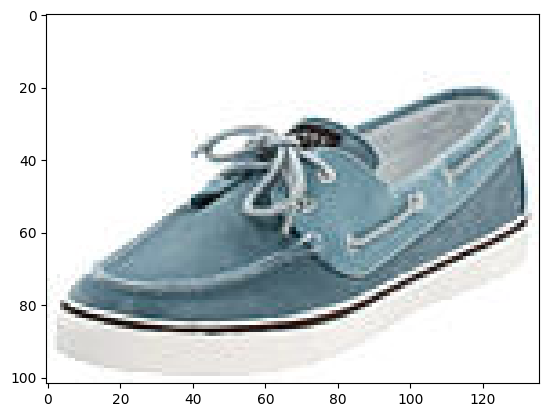

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image_1)